In [51]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv('data.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'runtime'])
df = dataframe[['nodes_expanded', 'runtime']]


<AxesSubplot:xlabel='nodes_expanded', ylabel='runtime'>

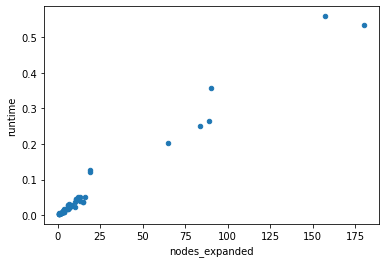

In [52]:
df.plot.scatter(x='nodes_expanded', y="runtime")

In [53]:
df.shape

(64, 2)

In [61]:
import random

def make_empty_instance(filename, rows, cols, agents):
    file = open(filename, 'w')
    locs_generated = 0
    
    locations = []
    while (locs_generated < agents*2):
        rand_loc = (random.randint(1,rows-1), random.randint(1,cols-1))
        if (rand_loc not in locations):
            locations.append(rand_loc)
            locs_generated += 1
    
    start_locs = locations[:agents]
    goal_locs = locations[agents:]
    
    border = '@ ' * (cols+2) + '\n'
    file.write(f'{cols+2} {rows+2}\n')
    file.write(border)
    for r in range(rows):
        row = '@ '
        for c in range(cols):
            if ((r,c) in start_locs):
                row += 'S '
            elif ((r,c) in goal_locs):
                row += 'G '
            else:
                row += '. '
        row += '@'
        file.write(row + '\n')
    file.write(border)
    file.write(str(agents)+'\n')
    for i in range(agents):
        res = f'{start_locs[i][0]} {start_locs[i][1]} {goal_locs[i][0]} {goal_locs[i][1]}\n'
        file.write(res)
    

In [62]:
filename = 'random_1.txt'
make_empty_instance(filename,10,10,5)